In [201]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

titanic/test.csv
titanic/train.csv
titanic/gender_submission.csv


In [202]:
# データの読み込み
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

sample_sub = pd.read_csv('titanic/gender_submission.csv')

In [203]:
def display_pd(data):
    print(f'Train_df_shape : {data.shape}\n')
    print(f'{data.dtypes} \n')
    display(data.head())

In [204]:
display_pd(train_df)

Train_df_shape : (891, 12)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [207]:
print(train_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [163]:
sample_sub.to_csv('submission.csv',index = False)

In [164]:
# display_pd(train_df)

# passenger_id & pclass are not statistics
train_df = train_df.astype(
    {
        'PassengerId' : str,
        'Pclass' : str 
        }
    )
# display_pd(train_df)

display(train_df.describe())

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [165]:
# show the categorical data
display(train_df.describe(exclude='number'))

,PassengerId,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,204,889
unique,891,3,891,2,681,147,3
top,1,3,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,491,1,577,7,4,644


In [166]:
def analysis_pd(data):
    data = data.astype(
        {
        'PassengerId' : str,
        'Pclass' : str 
        }
    )
    print('--statistics--')
    display(data.describe())
    print('--categorical--')
    display(data.describe(exclude='number'))
    
    # return changed data <-- after astype
    return data


In [167]:
train_df = analysis_pd(train_df)

--statistics--


,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


--categorical--


,PassengerId,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,204,889
unique,891,3,891,2,681,147,3
top,1,3,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,491,1,577,7,4,644


In [168]:
test_df = analysis_pd(test_df)

--statistics--


,Age,SibSp,Parch,Fare
count,332.000000,418.000000,418.000000,417.000000
mean,30.272590,0.447368,0.392344,35.627188
std,14.181209,0.896760,0.981429,55.907576
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,27.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.500000
max,76.000000,8.000000,9.000000,512.329200


--categorical--


,PassengerId,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,418,418,91,418
unique,418,3,418,2,363,76,3
top,892,3,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,218,1,266,5,3,270


In [169]:
all_df = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [170]:
all_df['Test_Flag'] = 0
all_df.loc[train_df.shape[0]: , 'Test_Flag'] = 1

In [171]:
all_df = analysis_pd(all_df)

--statistics--


,Survived,Age,SibSp,Parch,Fare,Test_Flag
count,891.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,0.383838,29.881138,0.498854,0.385027,33.295479,0.319328
std,0.486592,14.413493,1.041658,0.865560,51.758668,0.466394
min,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000


--categorical--


,PassengerId,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,1309,1309,295,1307
unique,1309,3,1307,2,929,186,3
top,1,3,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,1,709,2,843,11,6,914


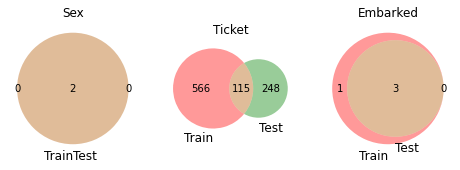

In [172]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

fig ,axes = plt.subplots(figsize=(8,8),ncols=3,nrows=1)

for col_name,ax in zip(
    ['Sex','Ticket','Embarked']
    ,axes.ravel()
    ):
    venn2(
        # train_dfとtest_dfのユニークな要素を抽出し、セットにする
        subsets=(set(train_df[col_name].unique()), set(test_df[col_name].unique())),
        set_labels=('Train', 'Test'),
        ax=ax
    )
    ax.set_title(col_name)

<AxesSubplot:xlabel='Survived', ylabel='count'>

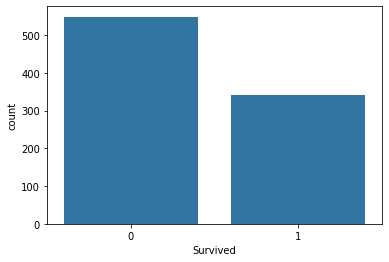

In [173]:
import seaborn as sns

sns.countplot(x='Survived', data=train_df) 

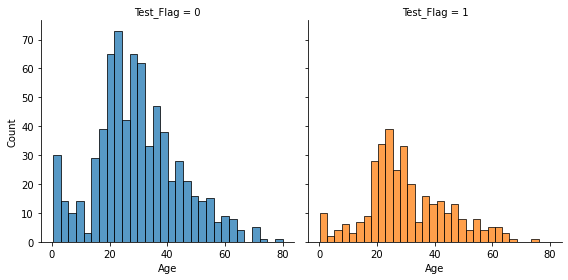

In [174]:
# Ageについて可視化
fig = sns.FacetGrid(all_df, col='Test_Flag', hue='Test_Flag', height=4)
fig.map(sns.histplot, 'Age', bins=30, kde=False)

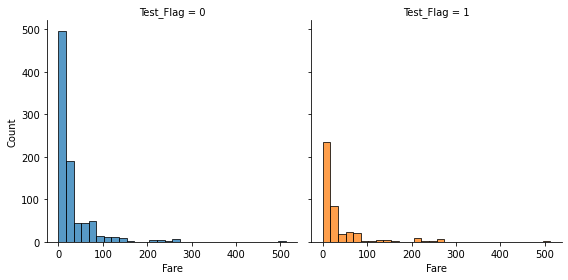

In [175]:
fig = sns.FacetGrid(all_df, col='Test_Flag', hue='Test_Flag', height=4)
fig.map(sns.histplot, 'Fare', bins=30, kde=False)

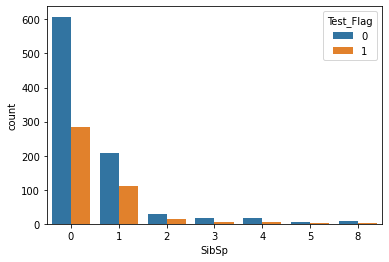

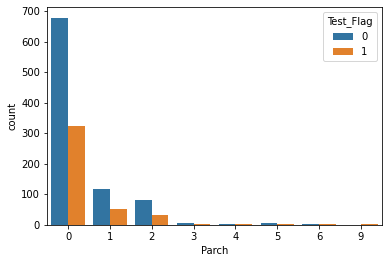

In [176]:
# SibSpについて可視化
sns.countplot(
    x='SibSp'
    ,hue='Test_Flag', data=all_df
    )
plt.show()

# Parchについて可視化
sns.countplot(
    x='Parch'
    ,hue='Test_Flag', data=all_df
    )
plt.legend(title='Test_Flag' ,loc='upper right')
plt.show()

<AxesSubplot:>

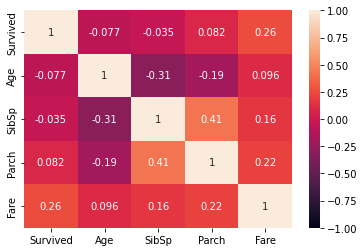

In [177]:
sns.heatmap(
    train_df[['Survived','Age','SibSp','Parch','Fare']].corr(),
    vmax=1,vmin=-1,annot=True
    )

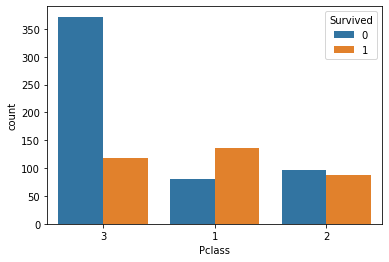

In [178]:
sns.countplot(x='Pclass', hue='Survived', data=train_df) 
plt.show()

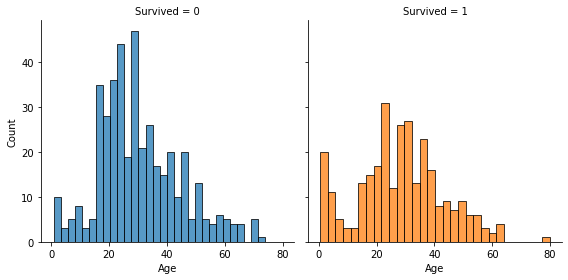

In [179]:
# Ageについて可視化
fig = sns.FacetGrid(train_df, col='Survived', hue='Survived', height=4)
fig.map(sns.histplot, 'Age', bins=30, kde=False)

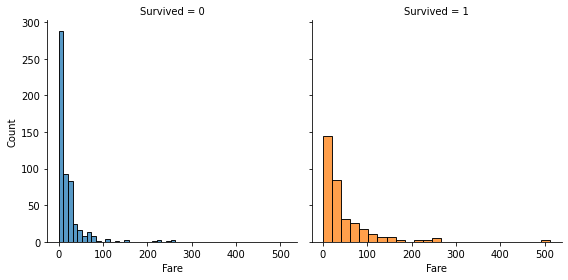

In [180]:
fig = sns.FacetGrid(train_df, col='Survived', hue='Survived', height=4)
fig.map(sns.histplot, 'Fare', bins=25, kde=False)

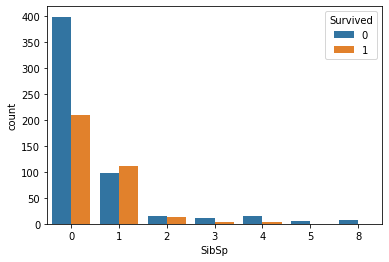

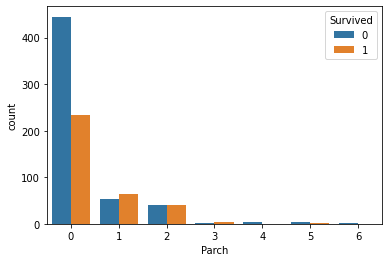

In [181]:
# SibSpについて可視化
sns.countplot(
    x='SibSp',
    hue='Survived', 
    data=train_df
    )
plt.legend(title='Survived', loc='upper right')
plt.show()

# Parchについて可視化
sns.countplot(
    x='Parch',
    hue='Survived', 
    data=train_df
    )
plt.legend(title='Survived' ,loc='upper right')
plt.show()

In [182]:
all_df['Age'] =  all_df['Age'].fillna( all_df['Age'].median())
all_df['Fare'] =  all_df['Fare'].fillna( all_df['Fare'].median())
all_df['Embarked'] =  all_df['Embarked'].fillna('NaN')

In [183]:
# Ageを4つの区間に分類し、カテゴリカル変数に変換
all_df['AgeBand'] = pd.qcut(all_df['Age'], 4)
# Fareのデータを4つの区間に分類し、カテゴリカル変数として扱う
all_df['FareBand'] = pd.qcut(all_df['Fare'], 4)

In [184]:
# Sex、PclassをOne-Hot_Encodingで変換
all_df = pd.get_dummies(all_df, columns= ["Sex", "Pclass"])

In [185]:
# EmbarkedをOne-Hot Encodingで変換
all_df = pd.get_dummies(all_df, columns=['AgeBand','FareBand','Embarked'])

In [186]:
from sklearn.model_selection import train_test_split
import re

# 前処理を施したall_dfを訓練データとテストデータに分割
train = all_df[all_df['Test_Flag']==0]
test = all_df[all_df['Test_Flag']==1].reset_index(drop=True)
target = train['Survived']

# 今回学習に用いないカラムを削除
drop_col = [
    'PassengerId', 'Age', 
    'Ticket', 'Fare', 'Cabin',
    'Test_Flag', 'Name', 'Survived'
    ]

train = train.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

# 学習できるようにカラム名を変更
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train.columns.values]
test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test.columns.values]

# 訓練データの一部を検証データに分割
# 注意 :   
# shuffleをTrueにするとランダムに分割されます。
# この時、random_stateを定義していないとモデルの再現性が取れなくなるので、設定するよう心がけてください。
X_train ,X_val ,y_train ,y_val = train_test_split(
    train, target, 
    test_size=0.2, shuffle=True,random_state=0
    )



In [187]:
X_train.head()

,SibSp,Parch,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,"AgeBand_(0.169, 22.0_","AgeBand_(22.0, 28.0_","AgeBand_(28.0, 35.0_","AgeBand_(35.0, 80.0_","FareBand_(-0.001, 7.896_","FareBand_(7.896, 14.454_","FareBand_(14.454, 31.275_","FareBand_(31.275, 512.329_",Embarked_C,Embarked_NaN,Embarked_Q,Embarked_S
140,0,2,True,False,False,False,True,False,True,False,False,False,False,True,False,True,False,False,False
439,0,0,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True
817,1,1,False,True,False,True,False,False,False,True,False,False,False,False,True,True,False,False,False
378,0,0,False,True,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False
491,0,0,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False,True


In [188]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score


# モデルを定義し学習
# model = LogisticRegression() 
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 訓練データに対しての予測を行い、正答率を算出
y_pred = model.predict(X_train)

print(accuracy_score(y_train, y_pred))

0.8848314606741573


In [189]:
y_pred_val = model.predict(
    X_val
    )

# 予測結果を正答率で評価
print(accuracy_score(
        y_val, y_pred_val
        )
    )

0.8212290502793296


In [190]:
# テストデータを予測
test_pred = model.predict(test)

# 予測結果をサブミットするファイル形式に変更
sample_sub["Survived"] = np.where(test_pred>=0.5, 1, 0)
display(sample_sub.head(10))

# 提出ファイルを出力
sample_sub.to_csv("submission.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [191]:
# 同乗した家族の人数 = 兄弟・配偶者の人数 + 両親・子供の人数 + 本人
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1


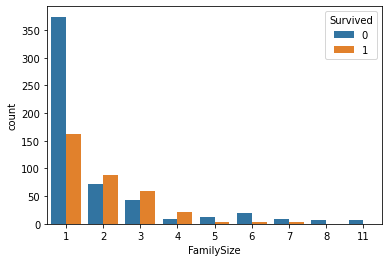

In [192]:
# FamilySizeと生存率の関係を可視化
sns.countplot(
    x='FamilySize',
    hue='Survived'
    , data=train_df
    )
plt.legend(title='Survived' ,loc='upper right')
plt.show()

In [193]:
display(train_df['FamilySize'].value_counts(ascending=False,normalize=True))

FamilySize
1     0.602694
2     0.180696
3     0.114478
4     0.032548
6     0.024691
5     0.016835
7     0.013468
11    0.007856
8     0.006734
Name: proportion, dtype: float64

In [211]:
#SHAPの準備
import shap
# explainer = shap.TreeExplainer(model,X_train)
# shap_values = explainer.shap_values(X=X_train)

background = shap.maskers.Independent(X_train, max_samples=5)
explainer = shap.Explainer(model, background)
shap_values = explainer(X_train)

Found a NULL input array in _cext_dense_tree_update_weights!


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [209]:
	
# i = 7
# shap.force_plot(explainer.expected_value, shap_values[i, :], y_train.iloc[i,:], link="logit")